In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def ci_likert(items, confidence_level=0.95):
    """ 
        Uses Goodman's formula to calculate the confidence interval of multinomial proportions surveys, as an example Likert Scales
        (http://faculty.nps.edu/rdfricke/OA4109/Lecture%209-1%20--%20Introduction%20to%20Survey%20Analysis.pdf).
        
        Parameters:
        
            - items (dict): keys are the classes and values are the number of responses
            - confidence_level (float): confidence level. Default: 0.95.
        
        Returns:
            
            - dict, where the keys are the items and values are a tuple with confidence intervals
    """
    
    alpha = 1 - confidence_level
    num_items = len(items)
    B = stats.chi2.ppf(1 - (alpha/np.float(num_items)), 1)  
    num_responses = np.sum([items[k] for k in items])
    
    d = {}
    for i in items:
        response = i
        qty = items[i]
        
        score = (qty + B/np.float(2)) / np.float(num_responses + B)
        
        error = np.sqrt(((B**2)/np.float(4) + 
                          B*qty*(1 - qty/np.float(num_responses))) / 
                          np.float(num_responses + B)**2)
        
        inf = score - error
        sup = score + error
        
        d[response] = {'score': score, 'inferior': inf, 'superior': sup, 'error': error}
        
    return d

In [3]:
rules2011 = pd.read_csv('apriori.rule.table-2011.csv')
rules2019 = pd.read_csv('apriori.rule.table-2019.csv')

In [4]:
rules2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1783 non-null   int64  
 1   support     1783 non-null   float64
 2   confidence  1783 non-null   float64
 3   lift        1783 non-null   float64
 4   count       1783 non-null   int64  
 5   lhs         1783 non-null   object 
 6   rhs         1783 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 97.6+ KB


In [5]:
rules2011.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
rules2011.shape

(1783, 6)

In [7]:
survey2011 = pd.read_csv('Data.Survey.2011.csv')
survey2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       1821 non-null   int64 
 1   Gender                                     1813 non-null   object
 2   Educational.Stage                          1786 non-null   object
 3   Field.Of.Interest                          1738 non-null   object
 4   Would.Enroll.In.CS                         1765 non-null   object
 5   Q1                                         1821 non-null   int64 
 6   Q2                                         1821 non-null   int64 
 7   CS.Only.Teaches.To.Use.Software            1758 non-null   object
 8   CS.Uses.Little.Math                        1741 non-null   object
 9   Most.CS.Students.Are.Male                  1739 non-null   object
 10  CS.Requires.Knowledge.In.Computers  

In [8]:
responses = pd.DataFrame(ci_likert(survey2011['Would.Enroll.In.CS'].value_counts().to_dict())).transpose()
responses

,score,inferior,superior,error
Yes,0.418395,0.390332,0.446458,0.028063
Maybe,0.346674,0.319603,0.373744,0.027071
No,0.236550,0.212388,0.260711,0.024162


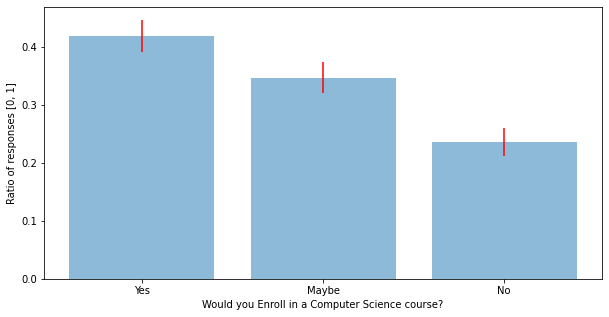

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(responses.index, responses.score, align='center', alpha=0.5)
plt.ylabel('Ratio of responses [0, 1]')
plt.xlabel('Would you Enroll in a Computer Science course?')
plt.errorbar(responses.index, responses.score, yerr=(responses.error, responses.error), fmt='r ',)
plt.show()

In [10]:
rules2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1951 non-null   int64  
 1   support     1951 non-null   float64
 2   confidence  1951 non-null   float64
 3   lift        1951 non-null   float64
 4   count       1951 non-null   int64  
 5   lhs         1951 non-null   object 
 6   rhs         1951 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 106.8+ KB


In [11]:
rules2019.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
rules2019.shape

(1951, 6)

In [13]:
survey2019 = pd.read_csv('Data.Survey.2019.csv')
survey2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       440 non-null    int64 
 1   Gender                                     440 non-null    object
 2   Educational.Stage                          438 non-null    object
 3   Field.Of.Interest                          416 non-null    object
 4   Would.Enroll.In.CS                         430 non-null    object
 5   Uses.Computer.At.Home                      440 non-null    object
 6   Uses.Computer.At.Relatives.House           440 non-null    object
 7   Uses.Computer.At.Friends.House             440 non-null    object
 8   Uses.Computer.At.School                    440 non-null    object
 9   Uses.Computer.At.Work                      440 non-null    object
 10  Uses.Computer.At.Lan.House            

In [14]:
responses = pd.DataFrame(ci_likert(survey2019['Would.Enroll.In.CS'].value_counts().to_dict())).transpose().reindex(['Yes', 'Maybe', 'No'])
responses

,score,inferior,superior,error
Yes,0.288861,0.236956,0.340765,0.051904
Maybe,0.451805,0.394733,0.508878,0.057073
No,0.265911,0.215335,0.316486,0.050575


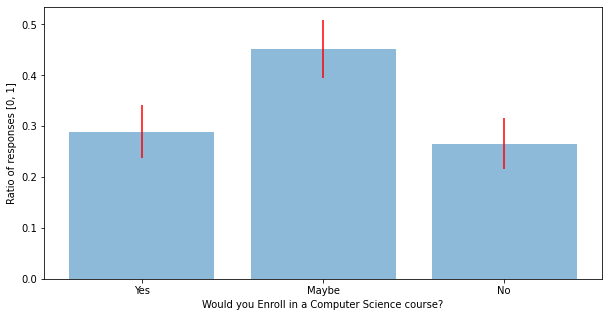

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(responses.index, responses.score, align='center', alpha=0.5)
plt.ylabel('Ratio of responses [0, 1]')
plt.xlabel('Would you Enroll in a Computer Science course?')
plt.errorbar(responses.index, responses.score, yerr=(responses.error, responses.error), fmt='r ',)
plt.show()

In [16]:
def generate_new_table(df, year):
    ls = []
    for i, rule in df.iterrows():

        if 'Year' in rule['lhs']:
            continue

        row = {'support (' + year + ')': rule['support'], 'confidence (' + year + ')': rule['confidence'], 
               'lift (' + year + ')': rule['lift'], 'count (' + year + ')': rule['count']}

        items = rule['lhs'].replace('{', '').replace('}', '').replace('\n', '').split(',')
        number = 0
        for item in items:
            number += 1
            try:
                question, result = item.split('=')
                question = question.strip()
                result = result.strip()

                if result.lower() not in ('yes', 'maybe', 'no'):
                    question = ' '.join([question, result]).replace(' ', '.').replace('(','').replace(')', '').replace('-','.')
                    result =  'Yes'

                row[question] = result
            except ValueError:
                print(item)

        question, result = rule['rhs'].replace('{', '').replace('}', '').split('=')
        row[question + ' (' + year + ')'] = result

        row['No. Questions'] = number

        ls.append(row.copy())

    newdf = pd.DataFrame(ls)
    newdf.fillna('-', inplace=True)

    return newdf

In [17]:
new2011 = generate_new_table(rules2011, '2011')
new2011.head()

,support (2011),confidence (2011),lift (2011),count (2011),Higher.Education.Required.To.Work.In.CS,Family.Approves.CS.Major,Would.Enroll.In.CS (2011),No. Questions,Has.Used.Games,Uses.Computer.At.Relatives.House,...,Most.CS.Students.Are.Male,Educational.Stage.Middle.School,Has.Used.Other.Softwares,Has.Used.For.Development,Has.Used.Spreadsheet,Has.Used.Database,Field.Of.Interest.Biology.Health.Sciences,Field.Of.Interest.Exact.Sciences,Educational.Stage.High.School.10th.Grade,Field.Of.Interest.Human.Sciences
0,0.127410,0.706107,1.579765,185,Yes,Yes,Yes,2,-,-,...,-,-,-,-,-,-,-,-,-,-
1,0.140496,0.684564,1.531566,204,-,Yes,Yes,2,Yes,-,...,-,-,-,-,-,-,-,-,-,-
2,0.128788,0.680000,1.521356,187,-,Yes,Yes,2,-,Yes,...,-,-,-,-,-,-,-,-,-,-
3,0.103306,0.678733,1.518521,150,-,Yes,Yes,2,-,-,...,-,-,-,-,-,-,-,-,-,-
4,0.130165,0.675000,1.510169,189,-,Yes,Yes,2,-,-,...,-,-,-,-,-,-,-,-,-,-


In [18]:
new2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   support (2011)                             1657 non-null   float64
 1   confidence (2011)                          1657 non-null   float64
 2   lift (2011)                                1657 non-null   float64
 3   count (2011)                               1657 non-null   int64  
 4   Higher.Education.Required.To.Work.In.CS    1657 non-null   object 
 5   Family.Approves.CS.Major                   1657 non-null   object 
 6   Would.Enroll.In.CS (2011)                  1657 non-null   object 
 7   No. Questions                              1657 non-null   int64  
 8   Has.Used.Games                             1657 non-null   object 
 9   Uses.Computer.At.Relatives.House           1657 non-null   object 
 10  Uses.Computer.At.Lan.Hou

In [19]:
new2011.shape

(1657, 42)

In [20]:
new2019 = generate_new_table(rules2019, '2019')
new2019.head()

,support (2019),confidence (2019),lift (2019),count (2019),Has.Used.Text.Editor,Family.Approves.CS.Major,Would.Enroll.In.CS (2019),No. Questions,Has.Used.Internet,Has.Used.Other.Softwares,...,CS.Provides.Good.Wages,CS.Requires.Knowledge.In.Computers,Educational.Stage.High.School.10th.Grade,CS.Work.Has.Long.Hours,Has.Used.Spreadsheet,Field.Of.Interest.Biology.Health.Sciences,Has.Used.Database,Most.CS.Students.Are.Male,Educational.Stage.Middle.School,Field.Of.Interest.Human.Sciences
0,0.106024,0.550000,2.113426,44,Yes,No,No,2,-,-,...,-,-,-,-,-,-,-,-,-,-
1,0.120482,0.537634,2.065910,50,-,No,No,2,Yes,-,...,-,-,-,-,-,-,-,-,-,-
2,0.108434,0.535714,2.058532,45,-,No,No,2,-,No,...,-,-,-,-,-,-,-,-,-,-
3,0.101205,0.531646,2.042897,42,-,No,No,2,-,-,...,-,-,-,-,-,-,-,-,-,-
4,0.106024,0.530120,2.037037,44,-,No,No,2,-,-,...,-,-,-,-,-,-,-,-,-,-


In [21]:
new2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   support (2019)                             1813 non-null   float64
 1   confidence (2019)                          1813 non-null   float64
 2   lift (2019)                                1813 non-null   float64
 3   count (2019)                               1813 non-null   int64  
 4   Has.Used.Text.Editor                       1813 non-null   object 
 5   Family.Approves.CS.Major                   1813 non-null   object 
 6   Would.Enroll.In.CS (2019)                  1813 non-null   object 
 7   No. Questions                              1813 non-null   int64  
 8   Has.Used.Internet                          1813 non-null   object 
 9   Has.Used.Other.Softwares                   1813 non-null   object 
 10  Has.Used.Games          

In [22]:
new2019.shape

(1813, 41)

In [23]:
set(new2011.columns) - set(new2019.columns)

{'Field.Of.Interest.Exact.Sciences',
 'Would.Enroll.In.CS (2011)',
 'confidence (2011)',
 'count (2011)',
 'lift (2011)',
 'support (2011)'}

In [24]:
new2019['Field.Of.Interest.Exact.Sciences'] = '-'
# new2019['Field.Of.Interest.Exact.Sciences'] = new2019['Field.Of.Interest.Exact.Sciences'].astype(object)

In [25]:
new2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   support (2019)                             1813 non-null   float64
 1   confidence (2019)                          1813 non-null   float64
 2   lift (2019)                                1813 non-null   float64
 3   count (2019)                               1813 non-null   int64  
 4   Has.Used.Text.Editor                       1813 non-null   object 
 5   Family.Approves.CS.Major                   1813 non-null   object 
 6   Would.Enroll.In.CS (2019)                  1813 non-null   object 
 7   No. Questions                              1813 non-null   int64  
 8   Has.Used.Internet                          1813 non-null   object 
 9   Has.Used.Other.Softwares                   1813 non-null   object 
 10  Has.Used.Games          

In [26]:
questions = list(set(new2011.columns).intersection(set(new2019.columns)))
questions

['Most.CS.Students.Are.Male',
 'Field.Of.Interest.Biology.Health.Sciences',
 'Uses.Computer.At.Friends.House',
 'Has.Used.Internet',
 'CS.Enables.Interdisciplinary.Experiences',
 'Field.Of.Interest.Human.Sciences',
 'Has.Used.For.Development',
 'Uses.Computer.At.Home',
 'Has.Used.For.Creating.Web.Pages',
 'Uses.Computer.At.School',
 'CS.Has.Low.Employability',
 'Educational.Stage.High.School.10th.Grade',
 'No. Questions',
 'Uses.Computer.At.Digital.Inclusion.Center',
 'Has.Used.Text.Editor',
 'Has.Used.Spreadsheet',
 'CS.Uses.Little.Math',
 'Family.Approves.CS.Major',
 'Uses.Computer.At.Work',
 'Uses.Computer.At.Relatives.House',
 'Higher.Education.Required.To.Work.In.CS',
 'CS.Requires.Knowledge.In.Computers',
 'Uses.Computer.At.Library',
 'CS.Work.Has.Long.Hours',
 'Uses.Computer.At.Lan.House',
 'Has.Used.Games',
 'Has.Used.Social.Network',
 'Educational.Stage.Middle.School',
 'CS.Provides.Good.Wages',
 'Has.Used.Image.Editor',
 'Has.Used.Other.Softwares',
 'Has.Used.Email',
 'CS.Onl

In [27]:
new2011.sort_values(by='lift (2011)', ascending=False, inplace=True)
new2011 = new2011.groupby(by=questions).first().reset_index()
new2011.shape

(864, 42)

In [28]:
new2019.sort_values(by='lift (2019)', ascending=False, inplace=True)
new2019 = new2019.groupby(by=questions).first().reset_index()
new2019.shape

(912, 42)

In [29]:
merged = pd.merge(new2011, new2019, on=questions)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 694
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Most.CS.Students.Are.Male                  695 non-null    object 
 1   Field.Of.Interest.Biology.Health.Sciences  695 non-null    object 
 2   Uses.Computer.At.Friends.House             695 non-null    object 
 3   Has.Used.Internet                          695 non-null    object 
 4   CS.Enables.Interdisciplinary.Experiences   695 non-null    object 
 5   Field.Of.Interest.Human.Sciences           695 non-null    object 
 6   Has.Used.For.Development                   695 non-null    object 
 7   Uses.Computer.At.Home                      695 non-null    object 
 8   Has.Used.For.Creating.Web.Pages            695 non-null    object 
 9   Uses.Computer.At.School                    695 non-null    object 
 10  CS.Has.Low.Employability  

In [30]:
merged

,Most.CS.Students.Are.Male,Field.Of.Interest.Biology.Health.Sciences,Uses.Computer.At.Friends.House,Has.Used.Internet,CS.Enables.Interdisciplinary.Experiences,Field.Of.Interest.Human.Sciences,Has.Used.For.Development,Uses.Computer.At.Home,Has.Used.For.Creating.Web.Pages,Uses.Computer.At.School,...,support (2011),confidence (2011),lift (2011),count (2011),Would.Enroll.In.CS (2011),support (2019),confidence (2019),lift (2019),count (2019),Would.Enroll.In.CS (2019)
0,-,-,-,-,-,-,-,-,-,-,...,0.188705,0.188705,1.000000,274,No,0.460241,0.460241,1.000000,191,Maybe
1,-,-,-,-,-,-,-,-,-,-,...,0.311295,0.382079,1.048732,452,Maybe,0.390361,0.472303,1.026209,162,Maybe
2,-,-,-,-,-,-,-,-,-,-,...,0.157025,0.192081,1.017888,228,No,0.378313,0.471471,1.024401,157,Maybe
3,-,-,-,-,-,-,-,-,-,-,...,0.114325,0.413965,1.136252,166,Maybe,0.108434,0.284810,1.094409,45,No
4,-,-,-,-,-,-,-,-,-,-,...,0.281680,0.464245,1.038650,409,Yes,0.166265,0.320930,1.148156,69,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,Yes,-,-,-,-,-,-,Yes,-,-,...,0.154959,0.383305,1.052096,225,Maybe,0.221687,0.497297,1.080515,92,Maybe
691,Yes,-,-,-,-,-,No,-,-,-,...,0.142562,0.407480,1.118453,207,Maybe,0.228916,0.524862,1.140407,95,Maybe
692,Yes,-,-,-,Yes,-,-,-,-,-,...,0.126033,0.378882,1.039956,183,Maybe,0.200000,0.494048,1.073454,83,Maybe
693,Yes,-,-,Yes,-,-,-,-,-,-,...,0.150138,0.378472,1.038831,218,Maybe,0.236145,0.494949,1.075414,98,Maybe


In [31]:
merged['wpm'] = merged['lift (2011)'] * merged['lift (2019)']
merged.sort_values(by='wpm', ascending=False, inplace=True)
merged.reset_index(drop=True, inplace=True)
merged

,Most.CS.Students.Are.Male,Field.Of.Interest.Biology.Health.Sciences,Uses.Computer.At.Friends.House,Has.Used.Internet,CS.Enables.Interdisciplinary.Experiences,Field.Of.Interest.Human.Sciences,Has.Used.For.Development,Uses.Computer.At.Home,Has.Used.For.Creating.Web.Pages,Uses.Computer.At.School,...,confidence (2011),lift (2011),count (2011),Would.Enroll.In.CS (2011),support (2019),confidence (2019),lift (2019),count (2019),Would.Enroll.In.CS (2019),wpm
0,-,-,-,-,Yes,-,-,-,-,-,...,0.663743,1.484984,227,Yes,0.101205,0.442105,1.581670,42,Yes,2.348754
1,-,-,-,-,-,-,-,-,-,-,...,0.660326,1.477340,243,Yes,0.103614,0.438776,1.569757,43,Yes,2.319065
2,-,-,-,-,-,-,-,-,-,-,...,0.656410,1.468579,256,Yes,0.110843,0.429907,1.538028,46,Yes,2.258715
3,-,-,-,-,-,-,-,-,-,-,...,0.640449,1.432870,228,Yes,0.108434,0.432692,1.547994,45,Yes,2.218074
4,-,-,-,Yes,-,-,-,-,-,-,...,0.648199,1.450209,234,Yes,0.113253,0.427273,1.528605,47,Yes,2.216797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,-,-,-,-,-,-,-,-,-,-,...,0.489412,1.094955,208,Yes,0.101205,0.358974,0.779970,42,Maybe,0.854033
691,-,-,-,-,-,Yes,-,-,-,-,...,0.383033,0.856956,149,Yes,0.125301,0.452174,0.982472,52,Maybe,0.841935
692,-,-,-,-,-,Yes,-,-,-,-,...,0.384422,0.860063,153,Yes,0.113253,0.439252,0.954396,47,Maybe,0.820841
693,-,-,-,-,-,Yes,-,-,-,-,...,0.405405,0.907009,165,Yes,0.106024,0.411215,0.893478,44,Maybe,0.810392


In [32]:
merged.head(5).replace('-', np.nan).dropna(axis=1, how='all').fillna('-')

,Has.Used.Internet,CS.Enables.Interdisciplinary.Experiences,No. Questions,Family.Approves.CS.Major,Uses.Computer.At.Work,Uses.Computer.At.Library,CS.Fosters.Creativity,support (2011),confidence (2011),lift (2011),count (2011),Would.Enroll.In.CS (2011),support (2019),confidence (2019),lift (2019),count (2019),Would.Enroll.In.CS (2019),wpm
0,-,Yes,2,Yes,-,-,-,0.156336,0.663743,1.484984,227,Yes,0.101205,0.442105,1.581670,42,Yes,2.348754
1,-,-,2,Yes,-,-,Yes,0.167355,0.660326,1.477340,243,Yes,0.103614,0.438776,1.569757,43,Yes,2.319065
2,-,-,2,Yes,No,-,-,0.176309,0.656410,1.468579,256,Yes,0.110843,0.429907,1.538028,46,Yes,2.258715
3,-,-,2,Yes,-,No,-,0.157025,0.640449,1.432870,228,Yes,0.108434,0.432692,1.547994,45,Yes,2.218074
4,Yes,-,2,Yes,-,-,-,0.161157,0.648199,1.450209,234,Yes,0.113253,0.427273,1.528605,47,Yes,2.216797


In [63]:
kept = merged.loc[(merged['No. Questions'] == 1) & (merged['Would.Enroll.In.CS (2011)'] == merged['Would.Enroll.In.CS (2019)'])]
kept.reset_index(drop=True, inplace=True)
kept5 = kept.head(5) \
            .replace('-', np.nan) \
            .dropna(axis=1, how='all') \
            .fillna('-') \
            .drop(columns=['No. Questions', 'wpm', 'support (2011)', 'support (2019)', 
                           'confidence (2011)', 'confidence (2019)']) \
            [['Would.Enroll.In.CS (2011)', 'Family.Approves.CS.Major',
              'Higher.Education.Required.To.Work.In.CS', 'Uses.Computer.At.Lan.House', 
              'lift (2011)', 'count (2011)', 'lift (2019)', 'count (2019)']]
print(kept5.to_markdown())

|    | Would.Enroll.In.CS (2011)   | Family.Approves.CS.Major   | Higher.Education.Required.To.Work.In.CS   | Uses.Computer.At.Lan.House   |   lift (2011) |   count (2011) |   lift (2019) |   count (2019) |
|---:|:----------------------------|:---------------------------|:------------------------------------------|:-----------------------------|--------------:|---------------:|--------------:|---------------:|
|  0 | Yes                         | Yes                        | -                                         | -                            |       1.46495 |            294 |       1.48561 |             49 |
|  1 | Yes                         | -                          | -                                         | Yes                          |       1.14987 |            313 |       1.45037 |             45 |
|  2 | Maybe                       | Maybe                      | -                                         | -                            |       1.32681 |            291 

In [34]:
kept = merged.loc[merged['Would.Enroll.In.CS (2011)'] == merged['Would.Enroll.In.CS (2019)']]
kept.reset_index(drop=True,inplace=True)
kept.head(5).replace('-', np.nan).dropna(axis=1, how='all').fillna('-')

,Has.Used.Internet,CS.Enables.Interdisciplinary.Experiences,No. Questions,Family.Approves.CS.Major,Uses.Computer.At.Work,Uses.Computer.At.Library,CS.Fosters.Creativity,support (2011),confidence (2011),lift (2011),count (2011),Would.Enroll.In.CS (2011),support (2019),confidence (2019),lift (2019),count (2019),Would.Enroll.In.CS (2019),wpm
0,-,Yes,2,Yes,-,-,-,0.156336,0.663743,1.484984,227,Yes,0.101205,0.442105,1.581670,42,Yes,2.348754
1,-,-,2,Yes,-,-,Yes,0.167355,0.660326,1.477340,243,Yes,0.103614,0.438776,1.569757,43,Yes,2.319065
2,-,-,2,Yes,No,-,-,0.176309,0.656410,1.468579,256,Yes,0.110843,0.429907,1.538028,46,Yes,2.258715
3,-,-,2,Yes,-,No,-,0.157025,0.640449,1.432870,228,Yes,0.108434,0.432692,1.547994,45,Yes,2.218074
4,Yes,-,2,Yes,-,-,-,0.161157,0.648199,1.450209,234,Yes,0.113253,0.427273,1.528605,47,Yes,2.216797


In [67]:
changed = merged.loc[(merged['No. Questions'] == 1) & (merged['Would.Enroll.In.CS (2011)'] != merged['Would.Enroll.In.CS (2019)'])]
changed.reset_index(drop=True, inplace=True)
changed5 = changed.head(5) \
            .replace('-', np.nan) \
            .dropna(axis=1, how='all') \
            .fillna('-') \
            .drop(columns=['No. Questions', 'wpm', 'support (2011)', 'support (2019)', 
                           'confidence (2011)', 'confidence (2019)']) \
            [['Would.Enroll.In.CS (2011)', 'Would.Enroll.In.CS (2019)', 
              'Most.CS.Students.Are.Male', 'Uses.Computer.At.Friends.House', 	
              'Uses.Computer.At.Relatives.House', 'Educational.Stage.Middle.School', 
              'lift (2011)', 'count (2011)', 'lift (2019)', 'count (2019)']]
print(changed5.to_markdown())

|    | Would.Enroll.In.CS (2011)   | Would.Enroll.In.CS (2019)   | Most.CS.Students.Are.Male   | Uses.Computer.At.Friends.House   | Uses.Computer.At.Relatives.House   | Educational.Stage.Middle.School   |   lift (2011) |   count (2011) |   lift (2019) |   count (2019) |
|---:|:----------------------------|:----------------------------|:----------------------------|:---------------------------------|:-----------------------------------|:----------------------------------|--------------:|---------------:|--------------:|---------------:|
|  0 | Maybe                       | Yes                         | -                           | Yes                              | -                                  | -                                 |       1.06854 |            371 |       1.23929 |             53 |
|  1 | Yes                         | No                          | -                           | -                                | No                                 | -                 

In [36]:
changed = merged.loc[merged['Would.Enroll.In.CS (2011)'] != merged['Would.Enroll.In.CS (2019)']]
changed.reset_index(drop=True, inplace=True)
changed.head(5).replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,0,1,2,3,4
Has.Used.For.Development,-,-,-,-,No
CS.Has.Low.Employability,-,-,-,Maybe,-
No. Questions,2,2,2,2,2
Has.Used.Text.Editor,-,Yes,-,-,-
Family.Approves.CS.Major,Yes,Yes,-,-,Yes
Uses.Computer.At.Relatives.House,-,-,Yes,-,-
Has.Used.Other.Softwares,-,-,-,No,-
Has.Used.Email,Yes,-,-,-,-
CS.Is.Prestigious,-,-,Yes,-,-
support (2011),0.165289,0.152893,0.154959,0.106749,0.140496


In [37]:
merged.loc[(merged['No. Questions'] == 1) & (merged['Family.Approves.CS.Major'] != '-')].replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,5,46
No. Questions,1,1
Family.Approves.CS.Major,Yes,Maybe
support (2011),0.202479,0.200413
confidence (2011),0.654788,0.483389
lift (2011),1.46495,1.32681
count (2011),294,291
Would.Enroll.In.CS (2011),Yes,Maybe
support (2019),0.118072,0.245783
confidence (2019),0.415254,0.525773
lift (2019),1.48561,1.14239


In [38]:
new2011.loc[(new2011['No. Questions'] == 1) & (new2011['Family.Approves.CS.Major'] != '-')].replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,30,31
No. Questions,1,1
Family.Approves.CS.Major,Maybe,Yes
support (2011),0.200413,0.202479
confidence (2011),0.483389,0.654788
lift (2011),1.32681,1.46495
count (2011),291,294
Would.Enroll.In.CS (2011),Maybe,Yes


In [39]:
new2011.loc[new2011['Family.Approves.CS.Major'] == 'No']

,Most.CS.Students.Are.Male,Field.Of.Interest.Biology.Health.Sciences,Uses.Computer.At.Friends.House,Has.Used.Internet,CS.Enables.Interdisciplinary.Experiences,Field.Of.Interest.Human.Sciences,Has.Used.For.Development,Uses.Computer.At.Home,Has.Used.For.Creating.Web.Pages,Uses.Computer.At.School,...,CS.Only.Teaches.To.Use.Software,Field.Of.Interest.Exact.Sciences,CS.Is.Prestigious,CS.Fosters.Creativity,Has.Used.Database,support (2011),confidence (2011),lift (2011),count (2011),Would.Enroll.In.CS (2011)


In [40]:
new2019.loc[(new2019['No. Questions'] == 1) & (new2019['Family.Approves.CS.Major'] != '-')].replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,30,31,32
No. Questions,1,1,1
Family.Approves.CS.Major,Maybe,No,Yes
support (2019),0.245783,0.125301,0.118072
confidence (2019),0.525773,0.514851,0.415254
lift (2019),1.14239,1.97836,1.48561
count (2019),102,52,49
Would.Enroll.In.CS (2019),Maybe,No,Yes


In [41]:
new2019.loc[(new2019['No. Questions'] == 1) & (new2019['CS.Is.Prestigious'] != '-')].replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,3,4
No. Questions,1,1
CS.Is.Prestigious,Maybe,Yes
support (2019),0.108434,0.166265
confidence (2019),0.28481,0.32093
lift (2019),1.09441,1.14816
count (2019),45,69
Would.Enroll.In.CS (2019),No,Yes


In [42]:
new2011.loc[(new2011['No. Questions'] == 1) & (new2011['CS.Is.Prestigious'] != '-')].replace('-', np.nan).dropna(axis=1, how='all').fillna('-').transpose()

,4,5
No. Questions,1,1
CS.Is.Prestigious,Maybe,Yes
support (2011),0.114325,0.28168
confidence (2011),0.413965,0.464245
lift (2011),1.13625,1.03865
count (2011),166,409
Would.Enroll.In.CS (2011),Maybe,Yes
